In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy as sp
import math
import matplotlib.pyplot as plt
from scipy import signal

import os
setting = pd.read_csv('setting_grf.csv', header = 0, usecols = [0,1])

### Import Force Data

The Force Data will be imported following the setting file. 
Here the left/right leg is corresponded to the force plate 1/2.

In [20]:
#Force data for right leg
DATA_R = setting.iloc[0,1]
data_R = pd.read_csv(DATA_R, header=31)
data1_R = pd.read_csv(DATA_R, header=31)
data2_R = pd.read_csv(DATA_R, header=31)
data3_R = pd.read_csv(DATA_R, header=31)

#Force data for left leg
DATA_L = setting.iloc[1,1]
data_L = pd.read_csv(DATA_L, header=31)
data1_L = pd.read_csv(DATA_L, header=31)
data2_L = pd.read_csv(DATA_L, header=31)
data3_L = pd.read_csv(DATA_L, header=31)

#Get the recorded time
time = pd.read_csv(DATA_L, header=31, usecols = [1])

### Import Markers data 
    X.2 : L.HEEL.X 
    X.11: L.HEEL.TOE.LAT
    X.12: L.HEEL.TOE.MED
    X.13: L.TOE.TIP.X
    X.16: R.HEEL.X
    X.25: R.TOE.LAT
    X.26: R.TOE.MED
    X.27: R.TOE.TIP.X

In [21]:
MOTION = setting.iloc[2,1] #The motion capture data
Markers = pd.read_csv(MOTION, header=5, usecols=[1,8,9,10,35,36,37,38,39,40,41,42,43,50,51,52,77,78,79,80,81,82,83,84,85])
Markers

,Time (Seconds),X.2,Y.2,Z.2,X.11,Y.11,Z.11,X.12,Y.12,Z.12,...,Z.16,X.25,Y.25,Z.25,X.26,Y.26,Z.26,X.27,Y.27,Z.27
0,0.00,-0.717271,0.047575,0.098883,-0.575173,0.036529,-0.008316,-0.520657,0.037907,0.089936,...,0.420670,-0.563224,0.035628,0.522765,-0.511154,0.030428,0.423457,-0.515248,0.042019,0.487169
1,0.01,-0.717274,0.047582,0.098883,-0.575173,0.036528,-0.008322,-0.520654,0.037917,0.089930,...,0.420665,-0.563225,0.035627,0.522766,-0.511155,0.030428,0.423457,-0.515251,0.042010,0.487162
2,0.02,-0.717277,0.047589,0.098883,-0.575172,0.036528,-0.008328,-0.520651,0.037927,0.089925,...,0.420661,-0.563226,0.035627,0.522767,-0.511156,0.030428,0.423457,-0.515253,0.042001,0.487155
3,0.03,-0.717279,0.047596,0.098884,-0.575172,0.036527,-0.008332,-0.520649,0.037934,0.089920,...,0.420657,-0.563226,0.035627,0.522768,-0.511156,0.030427,0.423456,-0.515255,0.041989,0.487147
4,0.04,-0.717279,0.047603,0.098886,-0.575171,0.036525,-0.008336,-0.520648,0.037940,0.089916,...,0.420654,-0.563226,0.035628,0.522767,-0.511156,0.030426,0.423455,-0.515257,0.041974,0.487137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30267,302.67,0.324069,0.038954,0.366447,0.185831,0.027226,0.255159,0.268302,0.028557,0.178140,...,0.390253,0.806687,0.030167,0.267195,0.721458,0.021786,0.197041,0.782187,0.034915,0.214167
30268,302.68,0.324137,0.038943,0.366400,0.185769,0.027221,0.255208,0.268268,0.028613,0.178136,...,0.390307,0.806617,0.030205,0.267135,0.721408,0.021719,0.197006,0.782151,0.034943,0.214108
30269,302.69,0.324208,0.038930,0.366354,0.185725,0.027228,0.255248,0.268235,0.028668,0.178132,...,0.390361,0.806548,0.030243,0.267074,0.721355,0.021651,0.196967,0.782103,0.034971,0.214039
30270,302.70,0.324282,0.038915,0.366310,0.185689,0.027234,0.255287,0.268203,0.028724,0.178131,...,0.390415,0.806480,0.030280,0.267014,0.721299,0.021582,0.196926,0.782046,0.034998,0.213964


### Find the offset values 

In [22]:
#Right leg
FX_OFFSET_R = np.mean(data_R[" Fx"][5:15])
FY_OFFSET_R = np.mean(data_R[" Fy"][5:15])
FZ_OFFSET_R = np.mean(data_R[" Fz"][5:15])
MX_OFFSET_R = np.mean(data_R[" Mx"][5:15])
MY_OFFSET_R = np.mean(data_R[" My"][5:15])
MZ_OFFSET_R = np.mean(data_R[" Mz"][5:15])

#Left leg
FX_OFFSET_L = np.mean(data_L[" Fx"][5:15])
FY_OFFSET_L = np.mean(data_L[" Fy"][5:15])
FZ_OFFSET_L = np.mean(data_L[" Fz"][5:15])
MX_OFFSET_L = np.mean(data_L[" Mx"][5:15])
MY_OFFSET_L = np.mean(data_L[" My"][5:15])
MZ_OFFSET_L = np.mean(data_L[" Mz"][5:15])

In [23]:
data1_R[" Fx"] = data_R[" Fx"] - FX_OFFSET_R
data1_R[" Fy"] = data_R[" Fy"] - FY_OFFSET_R
data1_R[" Fz"] = data_R[" Fz"] - FZ_OFFSET_R
data1_R[" Mx"] = data_R[" Mx"] - MX_OFFSET_R
data1_R[" My"] = data_R[" My"] - MY_OFFSET_R
data1_R[" Mz"] = data_R[" Mz"] - MZ_OFFSET_R

data1_L[" Fx"] = data_L[" Fx"] - FX_OFFSET_L
data1_L[" Fy"] = data_L[" Fy"] - FY_OFFSET_L
data1_L[" Fz"] = data_L[" Fz"] - FZ_OFFSET_L
data1_L[" Mx"] = data_L[" Mx"] - MX_OFFSET_L
data1_L[" My"] = data_L[" My"] - MY_OFFSET_L
data1_L[" Mz"] = data_L[" Mz"] - MZ_OFFSET_L

### Calculate the CoP 

In [24]:
data1_R[" Cx"] = -data1_R[" My"]/data1_R[" Fz"]#Calculate CoP_x
data1_R[" Cy"] = data1_R[" Mx"]/data1_R[" Fz"] #Calculate CoP_y

data1_L[" Cx"] = -data1_L[" My"]/data1_L[" Fz"]#Calculate CoP_x
data1_L[" Cy"] = data1_L[" Mx"]/data1_L[" Fz"] #Calculate CoP_y


#for i in range(10900, 11000):
#    print (i,"Time", data1_R.loc[i," MocapTime"], "Fy", data1_R.loc[i," Fy"], "Fz", data1_R.loc[i," Fz"], "My", data1_R.loc[i," My"], "Cx", data1_R.loc[i," Cx"], "Cy", data1_R.loc[i," Cy"]  )

In [25]:
def Max_Min_filter(CoP,Upper_limit,Lower_limit):
    New_CoP = []
    for i in range(len(CoP)):
        if(CoP[i] > Upper_limit):
            New_CoP_temp = Upper_limit
        elif (CoP[i] < Lower_limit):
            New_CoP_temp = Lower_limit
        else:
            New_CoP_temp = CoP[i]
        New_CoP.append(New_CoP_temp)
    New_CoP = np.array(New_CoP)
    return New_CoP
    

In [26]:
#Find the limit of the CoP

L_X_Upper_limit = max(np.mean(Markers["X.12"][11000:15000]), np.mean(Markers["X.2"][11000:15000])) 
L_X_Lower_limit = np.mean(Markers["X.11"][11000:15000])
L_Z_Upper_limit = np.mean(Markers["Z.2"][11000:15000])
L_Z_Lower_limit = np.mean(Markers["Z.13"][11000:15000])

R_X_Upper_limit = np.mean(Markers["X.25"][11000:15000])
R_X_Lower_limit = min(np.mean(Markers["X.26"][11000:15000]), np.mean(Markers["X.16"][11000:15000]))
R_Z_Upper_limit = np.mean(Markers["Z.16"][11000:15000])
R_Z_Lower_limit = np.mean(Markers["Z.27"][11000:15000])


print(L_X_Upper_limit)
print(R_X_Upper_limit)

0.3230780442500002
0.8107597427500008


In [27]:
#Apply Min_Max Filter to the CoP data
data2_L[" Cx"] = Max_Min_filter(data1_L[" Cx"] + 0.25,L_X_Upper_limit,L_X_Lower_limit)
data2_L[" Cz"] = Max_Min_filter(data1_L[" Cy"] + 0.25,L_Z_Upper_limit,L_Z_Lower_limit)

data2_R[" Cx"] = Max_Min_filter(data1_R[" Cx"] + 0.75,R_X_Upper_limit,R_X_Lower_limit)
data2_R[" Cz"] = Max_Min_filter(data1_R[" Cy"] + 0.25,R_Z_Upper_limit,R_Z_Lower_limit)


In [28]:
# from scipy.signal import medfilt
# data2_R.loc[11000:," Cx"] = medfilt(data1_R.loc[11000:," Cx"] + 0.75, 31)
# data2_R.loc[11000:," Cz"] = medfilt(data1_R.loc[11000:," Cy"] + 0.25, 21)

# data2_L.loc[11000:," Cx"] = medfilt(data1_L.loc[11000:," Cx"] + 0.25, 31)
# data2_L.loc[11000:," Cz"] = medfilt(data1_L.loc[11000:," Cy"] + 0.25, 21)

### Apply the lowpass filter (f = 6 Hz) to the data

In [29]:
FREQ = 6 #Filter frequency
SAMPLING_FREQ = 100
low_pass = FREQ/(SAMPLING_FREQ/2)
b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')

In [30]:
data2_R[" Fx"] = - sp.signal.filtfilt(b2, a2, data1_R[" Fx"])
data2_R[" Fy"] =   sp.signal.filtfilt(b2, a2, data1_R[" Fz"])
data2_R[" Fz"] = - sp.signal.filtfilt(b2, a2, data1_R[" Fy"])
data2_R[" Mx"] =   sp.signal.filtfilt(b2, a2, data1_R[" Mx"])
data2_R[" My"] =   sp.signal.filtfilt(b2, a2, data1_R[" My"])
data2_R[" Mz"] =   sp.signal.filtfilt(b2, a2, data1_R[" Mz"])
data2_R[" Cx"] =   sp.signal.filtfilt(b2, a2, data2_R[" Cx"])
data2_R[" Cz"] =   sp.signal.filtfilt(b2, a2, data2_R[" Cz"])
data2_R[" Cy"] =   data1_R[" Cz"]

data2_L[" Fx"] = - sp.signal.filtfilt(b2, a2, data1_L[" Fx"])
data2_L[" Fy"] =   sp.signal.filtfilt(b2, a2, data1_L[" Fz"])
data2_L[" Fz"] = - sp.signal.filtfilt(b2, a2, data1_L[" Fy"])
data2_L[" Mx"] =   sp.signal.filtfilt(b2, a2, data1_L[" Mx"])
data2_L[" My"] =   sp.signal.filtfilt(b2, a2, data1_L[" My"])
data2_L[" Mz"] =   sp.signal.filtfilt(b2, a2, data1_L[" Mz"])
data2_L[" Cx"] =   sp.signal.filtfilt(b2, a2, data2_L[" Cx"])
data2_L[" Cz"] =   sp.signal.filtfilt(b2, a2, data2_L[" Cz"])
data2_L[" Cy"] =   data1_L[" Cz"]



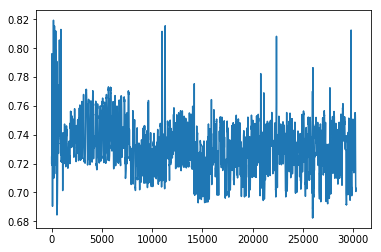

In [31]:
#data2_R.describe()
data2_R[" Cx"].plot()

### Shift the data due to the delay (default value is 10 frames)

In [32]:
data3_L[" Fx"] = data2_L[" Fx"].shift(-10, fill_value=0)
data3_L[" Fy"] = data2_L[" Fy"].shift(-10, fill_value=0)
data3_L[" Fz"] = data2_L[" Fz"].shift(-10, fill_value=0)
data3_L[" Mx"] = data2_L[" Mx"].shift(-10, fill_value=0)
data3_L[" My"] = data2_L[" My"].shift(-10, fill_value=0)
data3_L[" Mz"] = data2_L[" Mz"].shift(-10, fill_value=0)
data3_L[" Cx"] = data2_L[" Cx"].shift(-10, fill_value=0)
data3_L[" Cy"] = data2_L[" Cy"].shift(-10, fill_value=0)
data3_L[" Cz"] = data2_L[" Cz"].shift(-10, fill_value=0)

data3_R[" Fx"] = data2_R[" Fx"].shift(-10, fill_value=0)
data3_R[" Fy"] = data2_R[" Fy"].shift(-10, fill_value=0)
data3_R[" Fz"] = data2_R[" Fz"].shift(-10, fill_value=0)
data3_R[" Mx"] = data2_R[" Mx"].shift(-10, fill_value=0)
data3_R[" My"] = data2_R[" My"].shift(-10, fill_value=0)
data3_R[" Mz"] = data2_R[" Mz"].shift(-10, fill_value=0)
data3_R[" Cx"] = data2_R[" Cx"].shift(-10, fill_value=0)
data3_R[" Cy"] = data2_R[" Cy"].shift(-10, fill_value=0)
data3_R[" Cz"] = data2_R[" Cz"].shift(-10, fill_value=0)

data3_R.describe()

,MocapFrame,MocapTime,DeviceFrame,Fx,Fy,Fz,Mx,My,Mz,Cx,Cy,Cz
count,30272.000000,30272.00000,30272.000000,30272.000000,30272.000000,30272.000000,30272.000000,30272.000000,30272.000000,30272.000000,30272.0,30272.000000
mean,15135.500000,151.35500,15135.500000,-41.936333,274.368794,5.010520,4.307624,4.814800,-0.504339,0.730796,0.0,0.274184
std,8738.918011,87.38918,8738.918011,23.791628,133.663127,14.008430,13.819810,5.548667,2.373003,0.021769,0.0,0.041623
min,0.000000,0.00000,0.000000,-197.774106,-39.618307,-62.342014,-64.675796,-17.792976,-14.055502,0.000000,0.0,0.000000
25%,7567.750000,75.67750,7567.750000,-57.503465,214.763256,-3.094214,-1.962698,0.857300,-1.930117,0.720019,0.0,0.241801
50%,15135.500000,151.35500,15135.500000,-45.591885,296.788586,2.042489,3.653415,4.135420,-0.376375,0.730254,0.0,0.280121
75%,22703.250000,227.03250,22703.250000,-28.665930,355.903625,10.047988,12.777389,7.663953,0.593974,0.742750,0.0,0.305562
max,30271.000000,302.71000,30271.000000,11.888301,1167.529986,141.332890,45.838122,38.575990,12.576269,0.819376,0.0,0.393104


### Prepare data for saving

In [33]:
data3_R = data3_R.rename(columns={" Fx": "ground_force_vx", " Fy": "ground_force_vy", " Fz": "ground_force_vz", " Cx": "ground_force_px", " Cy": "ground_force_py", " Cz": "ground_force_pz", " Mx": "ground_torque_x", " My": "ground_torque_y", " Mz": "ground_torque_z" })
data3_L = data3_L.rename(columns={" Fx": "1_ground_force_vx", " Fy": "1_ground_force_vy", " Fz": "1_ground_force_vz", " Cx": "1_ground_force_px", " Cy": "1_ground_force_py", " Cz": "1_ground_force_pz", " Mx": "1_ground_torque_x", " My": "1_ground_torque_y", " Mz": "1_ground_torque_z" })
time = time.rename(columns={" MocapTime": "time"})

In [34]:
#Need to change these values depending on the size of dataset 
start_time = 1100
end_time = 30250


force_data = pd.concat([time[start_time:end_time+1], data3_R.loc[start_time:end_time,"ground_force_vx":"ground_force_vz"], data3_R.loc[start_time:end_time,"ground_force_px":"ground_force_pz"], data3_L.loc[start_time:end_time,"1_ground_force_vx":"1_ground_force_vz"], data3_L.loc[start_time:end_time,"1_ground_force_px":"1_ground_force_pz"], data3_R.loc[start_time:end_time,"ground_torque_x":"ground_torque_z"], data3_L.loc[start_time:end_time,"1_ground_torque_x":"1_ground_torque_z"]], axis = 1)

In [35]:
output_name = setting.iloc[4,1]
output_path = setting.iloc[3,1]
if os.path.exists(output_path + output_name + '.sto'):
    os.remove(output_path + output_name + '.sto')
force_data.to_csv(output_path + output_name + '.sto',  sep='\t', index=False)

### Save the processed force data into .mot file

In [36]:
nRows = end_time - start_time + 1 
nColumns = 19 

with open(output_path + output_name + '.sto', "r+") as f:
    old = f.read() # read everything in the file
    f.seek(0) # rewind
    f.write(output_name + '.sto\n' +\
            'version=1\n' + \
            f'nRows={nRows}\n' + \
            f'nColumns={nColumns}\n' + \
            'inDegrees=yes\n' + \
            'endheader\n' + \
            old) #